In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

In [5]:
amazon = pd.read_csv(r"E:\Project\e-commerce\Amazon Sale Report.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26608\1994853187.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon = pd.read_csv(r"E:\Project\e-commerce\Amazon Sale Report.csv")


In [7]:
amazon.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [9]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [11]:
amazon.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [13]:
amazon.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [15]:
amazon.describe().T

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [17]:
amazon.describe(include='O')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


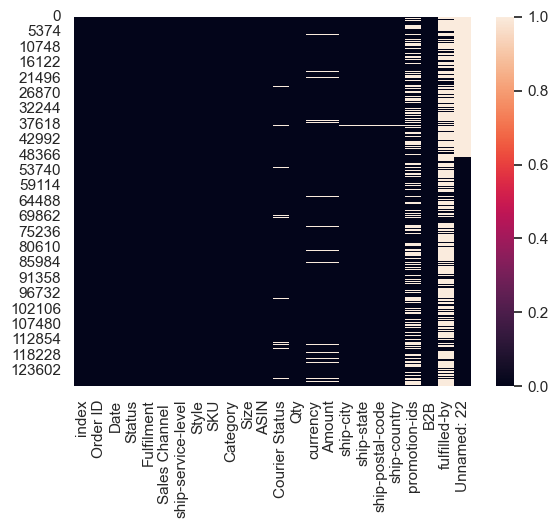

In [19]:
sns.heatmap(amazon.isnull())
plt.show()

In [21]:
amazon.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [23]:
amazon.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

In [25]:
amazon.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False


In [27]:
amazon[amazon.duplicated(['Order ID','ASIN'], keep=False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,NaN,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [29]:
len(amazon)-len(amazon.drop_duplicates(['Order ID','ASIN']))

7

In [31]:
amazon.drop_duplicates(['Order ID','ASIN'],inplace = True,ignore_index=True)

In [33]:
amazon['Courier Status'].fillna('unknown',inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26608\148288112.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['Courier Status'].fillna('unknown',inplace=True)


In [35]:
amazon['Courier Status'] = amazon['Courier Status'].fillna('unknown')


In [37]:
amazon['promotion-ids'] = amazon['promotion-ids'].fillna('no promotion')

In [39]:
amazon[amazon['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Status
Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: proportion, dtype: object

In [43]:
amazon['Amount'] = amazon['Amount'].fillna('0')

In [45]:
amazon['ship-city'] = amazon['ship-city'].fillna('unknown')
amazon['ship-state'] = amazon['ship-state'].fillna('unknown')
amazon['ship-postal-code'] = amazon['ship-postal-code'].fillna('unknown')

In [49]:
mapper = {'Order ID':'order_ID', 'Date':'date', 'Status':'ship_status','Fulfilment':'fullfilment',
          'ship-service-level':'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category', 
          'Size':'size', 'ASIN':'asin', 'Courier Status':'courier_ship_status', 'Qty':'order_quantity', 
          'Amount':'order_amount_($)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 
          'promotion-ids':'promotion','B2B':'customer_type'}

In [51]:
amazon.rename(columns=mapper, inplace =True)

In [53]:
amazon['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26608\1164148232.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)


In [69]:
amazon['date'] = amazon['date'].dt.strftime('%Y-%m-%d')


In [65]:
print(amazon.dtypes)


order_ID                object
date                     int64
ship_status             object
fullfilment             object
service_level           object
style                   object
sku                     object
product_category        object
size                    object
asin                    object
courier_ship_status     object
order_quantity           int64
order_amount_($)       float64
city                    object
state                   object
zip                     object
promotion               object
customer_type           object
dtype: object


In [67]:
amazon['date'] = pd.to_datetime(amazon['date'], errors='coerce')


In [57]:

amazon['date'] = pd.to_datetime(amazon['date'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26608\640486138.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon['date'] = pd.to_datetime(amazon['date'])


In [71]:
amazon[amazon.select_dtypes(include=['datetime']).columns] = amazon.select_dtypes(include=['datetime']).apply(lambda x: x.astype('int64'))
amazon.describe(include='all')

,order_ID,date,ship_status,fullfilment,service_level,style,sku,product_category,size,asin,courier_ship_status,order_quantity,order_amount_($),city,state,zip,promotion,customer_type
count,128968,128968,128968,128968,128968,128968,128968,128968,128968,128968,128968,128968.000000,128968.000000,128968,128968,128968.0,128968,128968
unique,120378,91,13,2,2,1377,7195,9,11,7190,4,NaN,NaN,8956,70,9460.0,5788,2
top,403-4984515-8861958,2022-05-03,Shipped,Amazon,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,NaN,NaN,BENGALURU,MAHARASHTRA,201301.0,no promotion,customer
freq,12,2083,77800,89691,88608,4224,773,50281,22709,773,109483,NaN,NaN,11216,22259,1006.0,49150,128097
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904449,609.372529,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313331,313.336473,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,413.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,583.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,771.000000,NaN,NaN,NaN,NaN,NaN


In [73]:
amazon.isnull().sum()

order_ID               0
date                   0
ship_status            0
fullfilment            0
service_level          0
style                  0
sku                    0
product_category       0
size                   0
asin                   0
courier_ship_status    0
order_quantity         0
order_amount_($)       0
city                   0
state                  0
zip                    0
promotion              0
customer_type          0
dtype: int64

In [75]:
amazon.nunique().to_frame(name='Count of unique values')

,Count of unique values
order_ID,120378
date,91
ship_status,13
fullfilment,2
service_level,2
style,1377
sku,7195
product_category,9
size,11
asin,7190


In [77]:
amazon.to_csv('amazon_data.csv', index=False)


In [79]:
import os
print(os.getcwd())  # This prints the current working directory


C:\Users\ASUS


In [81]:
amazon.to_csv(r'E:\Project\e-commerce\amazon_data.csv', index=False)


In [83]:
import glob
print(glob.glob("**/*.csv", recursive=True))  # This will find all CSV files in the project directory


['amazon_data.csv', 'Cleaned_Dataset.csv', 'Cleaned_Dataset2.csv', 'AppData\\Local\\seaborn\\seaborn\\Cache\\iris.csv', 'AppData\\Local\\Temp\\559ef6c3-0dd2-4431-b6e5-780216e7fc11_archive (6).zip.c11\\rides_data.csv', 'Desktop\\2.0\\Ed-Tech\\archive (6)\\Online_Courses.csv', 'Desktop\\cwre\\Rapido.csv', 'Desktop\\INTERNSHIP\\Cleaned_Dataset.csv', 'Desktop\\INTERNSHIP\\Cleaned_Dataset2.csv', 'Desktop\\INTERNSHIP\\Dataset.csv', 'Desktop\\LLC\\Data\\Blinkit\\archive (6)\\blinkit_customers.csv', 'Desktop\\LLC\\Data\\Blinkit\\archive (6)\\blinkit_customer_feedback.csv', 'Desktop\\LLC\\Data\\Blinkit\\archive (6)\\blinkit_delivery_performance.csv', 'Desktop\\LLC\\Data\\Blinkit\\archive (6)\\blinkit_inventory.csv', 'Desktop\\LLC\\Data\\Blinkit\\archive (6)\\blinkit_inventoryNew.csv', 'Desktop\\LLC\\Data\\Blinkit\\archive (6)\\blinkit_marketing_performance.csv', 'Desktop\\LLC\\Data\\Blinkit\\archive (6)\\blinkit_orders.csv', 'Desktop\\LLC\\Data\\Blinkit\\archive (6)\\blinkit_order_items.csv', '